In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/Users/daniyahammarah/Downloads/DSMP/fake_transactional_data_24.csv")

In [3]:
data

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025
...,...,...,...,...
10148275,32185.0,2.65,COFFEE_SHOP,31/12/2025
10148276,32185.0,2.45,COFFEE_SHOP,31/12/2025
10148277,57569.0,14.00,WINE_BAR,31/12/2025
10148278,1490.0,9.00,57569,31/12/2025


#### Renaming columns

In [4]:
data.rename(columns = {'from_totally_fake_account':'Sender_Account_Num', 'monopoly_money_amount':'Amount', 
                              'to_randomly_generated_account':'Receiver', 'not_happened_yet_date':'Transaction_date'}, inplace = True)


#### Converting Date col to Date Type

In [5]:
data["Transaction_date"] = pd.to_datetime(data.Transaction_date,format="%d/%m/%Y")
data["Transaction_Date"] = data['Transaction_date'].dt.strftime('%m/%d/%Y')
print(data['Transaction_date'])

0          2025-01-01
1          2025-01-01
2          2025-01-01
3          2025-01-01
4          2025-01-01
              ...    
10148275   2025-12-31
10148276   2025-12-31
10148277   2025-12-31
10148278   2025-12-31
10148279   2025-12-31
Name: Transaction_date, Length: 10148280, dtype: datetime64[ns]


In [6]:
data['Day_of_Week'] = data['Transaction_date'].dt.dayofweek
data['Month'] = data['Transaction_date'].dt.strftime('%B')
data['Week_of_Month'] = data['Transaction_date'].dt.day // 7 + 1
data


,Sender_Account_Num,Amount,Receiver,Transaction_date,Transaction_Date,Day_of_Week,Month,Week_of_Month
0,10371.0,4.00,CINEMA,2025-01-01,01/01/2025,2,January,1
1,88339.0,2.40,40544,2025-01-01,01/01/2025,2,January,1
2,18555.0,2.40,85149,2025-01-01,01/01/2025,2,January,1
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1
4,80792.0,1.95,18555,2025-01-01,01/01/2025,2,January,1
...,...,...,...,...,...,...,...,...
10148275,32185.0,2.65,COFFEE_SHOP,2025-12-31,12/31/2025,2,December,5
10148276,32185.0,2.45,COFFEE_SHOP,2025-12-31,12/31/2025,2,December,5
10148277,57569.0,14.00,WINE_BAR,2025-12-31,12/31/2025,2,December,5
10148278,1490.0,9.00,57569,2025-12-31,12/31/2025,2,December,5


In [7]:
#### Sender Accnt No. in INTEGER and extracting length of account number.

In [8]:
data['Sender_Account_Num'] = data['Sender_Account_Num'].astype(int)

data['Sender_Account_Num_Length'] = data['Sender_Account_Num'].astype(str).apply(lambda x: len(x))

unique_lengths = data['Sender_Account_Num_Length'].unique()
print(unique_lengths)

[5 4 6]


In [9]:
#### Receiver Accnt No. in INTEGER and extracting business names into new column.

In [10]:
data['Receiver_Account_Num'] = pd.to_numeric(data['Receiver'], errors='coerce')
mask = data['Receiver_Account_Num'].isna()
data.loc[mask, 'Receiver_Name'] = data.loc[mask, 'Receiver']

data['Receiver_Account_Num'] = data['Receiver_Account_Num'].fillna(0)

data['Receiver_Account_Num'] = data['Receiver_Account_Num'].astype(int)

data['Receiver_Account_Num_Length'] = data['Receiver_Account_Num'].astype(str).apply(lambda x: len(x))
data['Receiver_Name'] = data['Receiver_Name'].astype(str)

In [11]:
data


,Sender_Account_Num,Amount,Receiver,Transaction_date,Transaction_Date,Day_of_Week,Month,Week_of_Month,Sender_Account_Num_Length,Receiver_Account_Num,Receiver_Name,Receiver_Account_Num_Length
0,10371,4.00,CINEMA,2025-01-01,01/01/2025,2,January,1,5,0,CINEMA,1
1,88339,2.40,40544,2025-01-01,01/01/2025,2,January,1,5,40544,nan,5
2,18555,2.40,85149,2025-01-01,01/01/2025,2,January,1,5,85149,nan,5
3,18555,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1,5,0,HIPSTER_COFFEE_SHOP,1
4,80792,1.95,18555,2025-01-01,01/01/2025,2,January,1,5,18555,nan,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10148275,32185,2.65,COFFEE_SHOP,2025-12-31,12/31/2025,2,December,5,5,0,COFFEE_SHOP,1
10148276,32185,2.45,COFFEE_SHOP,2025-12-31,12/31/2025,2,December,5,5,0,COFFEE_SHOP,1
10148277,57569,14.00,WINE_BAR,2025-12-31,12/31/2025,2,December,5,5,0,WINE_BAR,1
10148278,1490,9.00,57569,2025-12-31,12/31/2025,2,December,5,4,57569,nan,5


In [12]:
receiver_names = data['Receiver_Name'].drop_duplicates()
receiver_names.to_csv('receiver_names.csv', index=False)

receiver_nums = data['Receiver_Account_Num'].drop_duplicates()
receiver_nums.to_csv('receiver_nums.csv', index=False)

#### Data Type

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148280 entries, 0 to 10148279
Data columns (total 12 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   Sender_Account_Num           int64         
 1   Amount                       float64       
 2   Receiver                     object        
 3   Transaction_date             datetime64[ns]
 4   Transaction_Date             object        
 5   Day_of_Week                  int32         
 6   Month                        object        
 7   Week_of_Month                int64         
 8   Sender_Account_Num_Length    int64         
 9   Receiver_Account_Num         int64         
 10  Receiver_Name                object        
 11  Receiver_Account_Num_Length  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(4)
memory usage: 890.4+ MB


#### Unique values 

In [14]:
data.nunique()

Sender_Account_Num              8142
Amount                          5236
Receiver                       14300
Transaction_date                 364
Transaction_Date                 364
Day_of_Week                        7
Month                             12
Week_of_Month                      5
Sender_Account_Num_Length          3
Receiver_Account_Num           14222
Receiver_Name                     80
Receiver_Account_Num_Length        4
dtype: int64

In [15]:
data.shape[0]

10148280

In [16]:
data_drop = data.drop_duplicates() #cant drop duplicates, the dates are not timestamped
data_drop.shape[0]

8482106

In [17]:
data_grouped = data.groupby(['Sender_Account_Num', 'Receiver_Account_Num', 'Transaction_Date']).agg({'Amount': 'sum'}).reset_index()

data_grouped.shape[0] #this will sum all transactions from one sender to one receiver in a day 

4324987

In [18]:
data['is_duplicate'] = data.duplicated(subset=['Sender_Account_Num', 'Receiver_Account_Num', 'Receiver_Name', 'Transaction_Date', 'Amount'], keep=False)

data_check = data
data_check.to_csv('data_check.csv', index=False)


In [19]:
summed_data = data.groupby(['Sender_Account_Num', 'Receiver_Account_Num', 'Receiver_Name','Transaction_Date', 'is_duplicate'], as_index=False)['Amount'].sum()

summed_data.to_csv('summed_data.csv', index=False)

In [20]:
summed_data.shape[0]

8121480

In [21]:
summed_data

,Sender_Account_Num,Receiver_Account_Num,Receiver_Name,Transaction_Date,is_duplicate,Amount
0,1000,0,A_CAFE,01/03/2025,False,2.25
1,1000,0,A_CAFE,01/07/2025,False,2.40
2,1000,0,A_CAFE,01/08/2025,False,2.55
3,1000,0,A_CAFE,01/09/2025,False,2.40
4,1000,0,A_CAFE,01/15/2025,False,6.50
...,...,...,...,...,...,...
8121475,100988,83562,nan,10/11/2025,False,5.50
8121476,100988,83562,nan,10/18/2025,True,18.00
8121477,100988,83562,nan,11/08/2025,True,9.00
8121478,100988,83562,nan,12/12/2025,False,6.50


# CUSTOMER ATTRITION

In [22]:
### days between transactions

In [23]:
data = data.sort_values(by=['Sender_Account_Num', 'Transaction_date'])

# Calculate the difference in days between consecutive transactions for each account
data['Days_between_trans'] = data.groupby('Sender_Account_Num')['Transaction_date'].diff().dt.days


In [24]:
unique_days = data['Days_between_trans'].unique()
print(unique_days)

[nan  0.  1.  2.  3.  4.  5.  6.  7.  8. 11.]


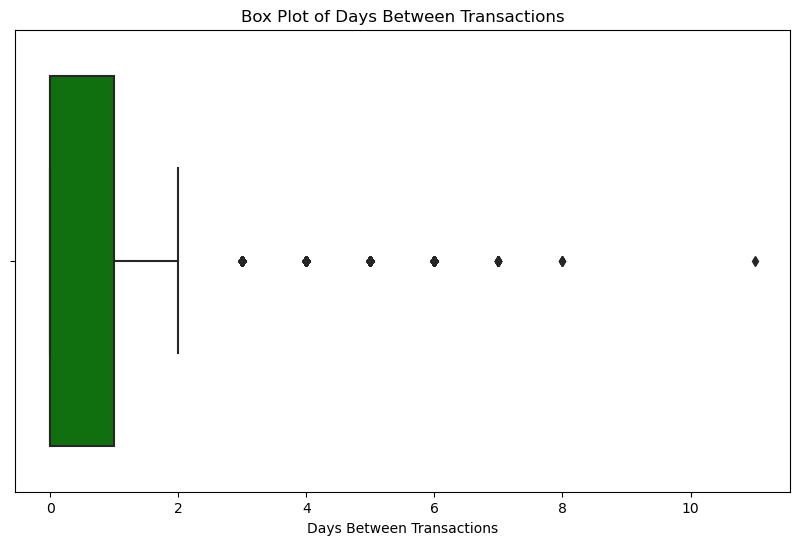

In [25]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Days_between_trans', data=data)
# plt.title('Box Plot of Days Between Transactions')
# plt.xlabel('Days Between Transactions')
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Days_between_trans', data=data, color='green')
plt.title('Box Plot of Days Between Transactions')
plt.xlabel('Days Between Transactions')
plt.show()

# FRAUD

#### Number of transactions by each spender per day

In [26]:
transaction_perday = data.groupby(['Sender_Account_Num','Transaction_Date']).size().reset_index(name='TransactionCount')
transaction_perday.sort_values(by='TransactionCount', ascending=False)

,Sender_Account_Num,Transaction_Date,TransactionCount
1392959,53545,08/01/2025,37
878315,33899,02/15/2025,33
311614,12673,12/13/2025,32
370999,15265,07/04/2025,32
355661,14634,04/04/2025,31
...,...,...,...
2279406,87765,11/04/2025,1
662276,25505,02/18/2025,1
1066611,40966,01/29/2025,1
1066610,40966,01/28/2025,1


#### Number of transactions by each spender per month

In [27]:
transaction_permonth = data.groupby(['Sender_Account_Num','Month']).size().reset_index(name='TransactionCount')
transaction_permonth.sort_values(by='TransactionCount', ascending=False)

,Sender_Account_Num,Month,TransactionCount
83965,87324,August,268
93544,97033,January,267
1411,2331,March,257
93545,97033,July,255
1406,2331,December,253
...,...,...,...
54171,55938,February,28
54173,55938,July,28
10576,11683,January,27
59982,62213,June,27


In [28]:
transaction_perdayofweek = data.groupby(['Sender_Account_Num','Day_of_Week']).size().reset_index(name='TransactionCount')
transaction_perdayofweek.sort_values(by='TransactionCount', ascending=False)


,Sender_Account_Num,Day_of_Week,TransactionCount
9454,17398,4,564
26086,46727,4,557
33219,59151,4,550
823,2331,4,547
23734,42371,4,540
...,...,...,...
14693,26016,0,15
14694,26016,1,14
31857,56402,0,13
48524,86356,0,13


#### PER MONTH transactions usual number and outliers

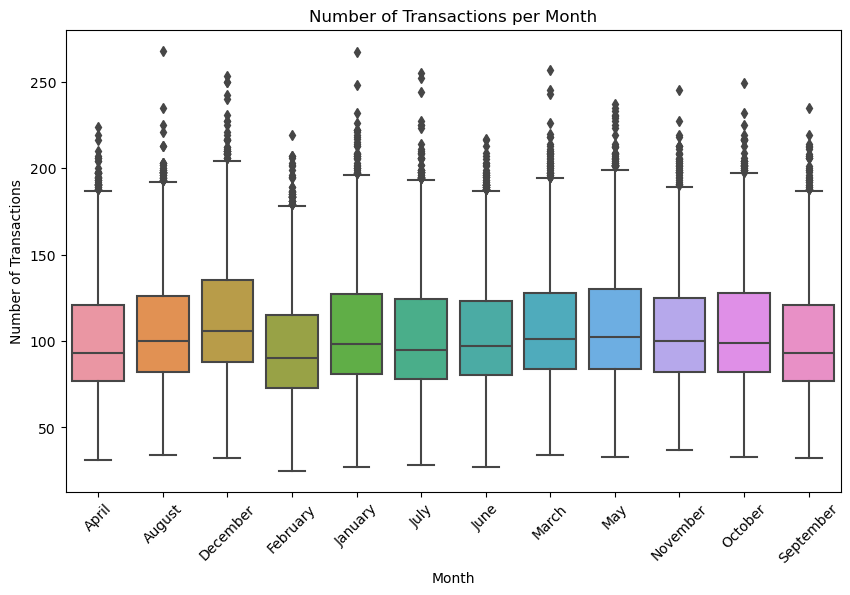

In [29]:
transactions_per_month = data.groupby(['Sender_Account_Num', 'Month']).size().reset_index(name='Num_transactions')

avg_transactions_per_month = transactions_per_month.groupby('Month')['Num_transactions'].size().reset_index()

# Plot a box plot showing the average number of transactions per month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Num_transactions', data=transactions_per_month)
plt.title('Number of Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

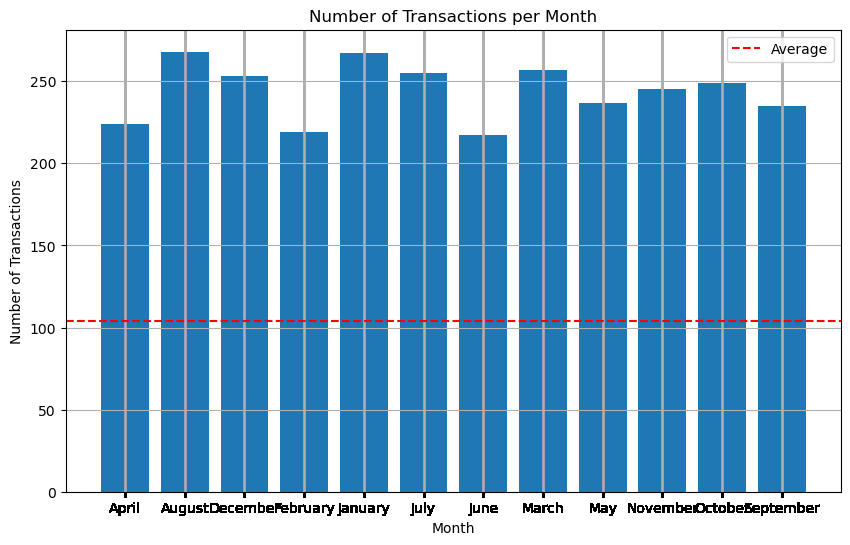

In [30]:
avg_transactions_per_month = transactions_per_month['Num_transactions'].mean()

# Plot a bar plot showing the average number of transactions per month
plt.figure(figsize=(10, 6))
plt.bar(transactions_per_month['Month'], transactions_per_month['Num_transactions'])
plt.axhline(y=avg_transactions_per_month, color='r', linestyle='--', label='Average')
plt.title('Number of Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(transactions_per_month['Month'])
plt.legend()
plt.grid(True)
plt.show()


In [31]:
senders_with_more_than_100_transactions = transactions_per_month.groupby('Sender_Account_Num').filter(lambda x: x['Num_transactions'].sum() > 100)['Sender_Account_Num'].unique()

# Create a new DataFrame containing only the senders with more than 100 transactions in any month
new_df = data[data['Sender_Account_Num'].isin(senders_with_more_than_100_transactions)].copy()

new_df

,Sender_Account_Num,Amount,Receiver,Transaction_date,Transaction_Date,Day_of_Week,Month,Week_of_Month,Sender_Account_Num_Length,Receiver_Account_Num,Receiver_Name,Receiver_Account_Num_Length,is_duplicate,Days_between_trans
15187,1000,8.99,STREAMING_SERVICE,2025-01-01,01/01/2025,2,January,1,4,0,STREAMING_SERVICE,1,False,NaN
17002,1000,2.40,GOURMET_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1,4,0,GOURMET_COFFEE_SHOP,1,False,0.0
17005,1000,2.55,GOURMET_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1,4,0,GOURMET_COFFEE_SHOP,1,False,0.0
17014,1000,2.20,A_LOCAL_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1,4,0,A_LOCAL_COFFEE_SHOP,1,False,0.0
17019,1000,13.06,LOCAL_PUB,2025-01-01,01/01/2025,2,January,1,4,0,LOCAL_PUB,1,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10105014,100988,3.00,CAFE,2025-12-29,12/29/2025,0,December,5,6,0,CAFE,1,False,0.0
10121703,100988,4.50,LUNCH_PLACE,2025-12-30,12/30/2025,1,December,5,6,0,LUNCH_PLACE,1,False,1.0
10138279,100988,3.00,LUNCH_VAN,2025-12-31,12/31/2025,2,December,5,6,0,LUNCH_VAN,1,False,1.0
10138280,100988,1.95,A_CAFE,2025-12-31,12/31/2025,2,December,5,6,0,A_CAFE,1,False,0.0


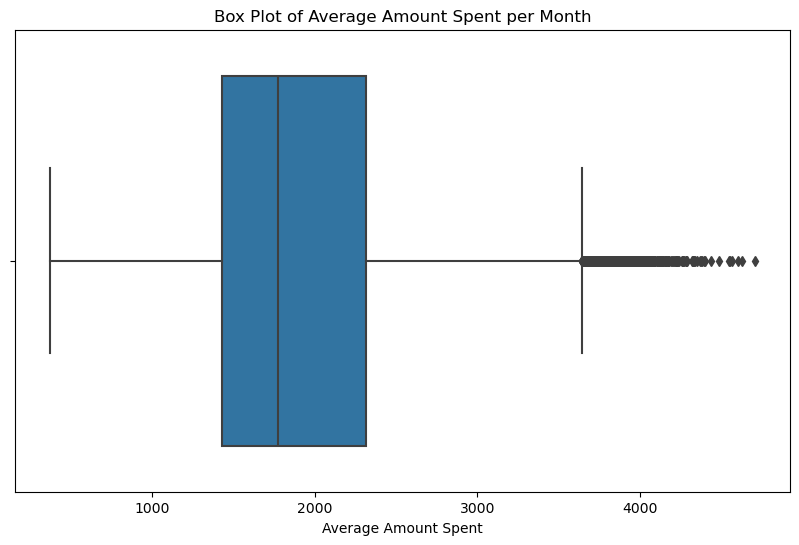

In [32]:

# Group the DataFrame by 'Sender_Account_Num' and 'Transaction_month' and sum the amount spent
monthly_spending = data.groupby(['Sender_Account_Num', 'Month'])['Amount'].sum().reset_index()

# Filter for senders who have transactions more than 100 in any month
senders_with_more_than_100_transactions = monthly_spending.groupby('Sender_Account_Num').filter(lambda x: x['Month'].nunique() > 1)['Sender_Account_Num'].unique()

# Filter the DataFrame to include only the senders with more than 100 transactions in any month
filtered_df = monthly_spending[monthly_spending['Sender_Account_Num'].isin(senders_with_more_than_100_transactions)]

# Calculate the average amount spent per month for each sender
average_monthly_spending = filtered_df.groupby('Sender_Account_Num')['Amount'].mean()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Amount', data=filtered_df)
plt.title('Box Plot of Average Amount Spent per Month')
plt.xlabel('Average Amount Spent')
plt.show()


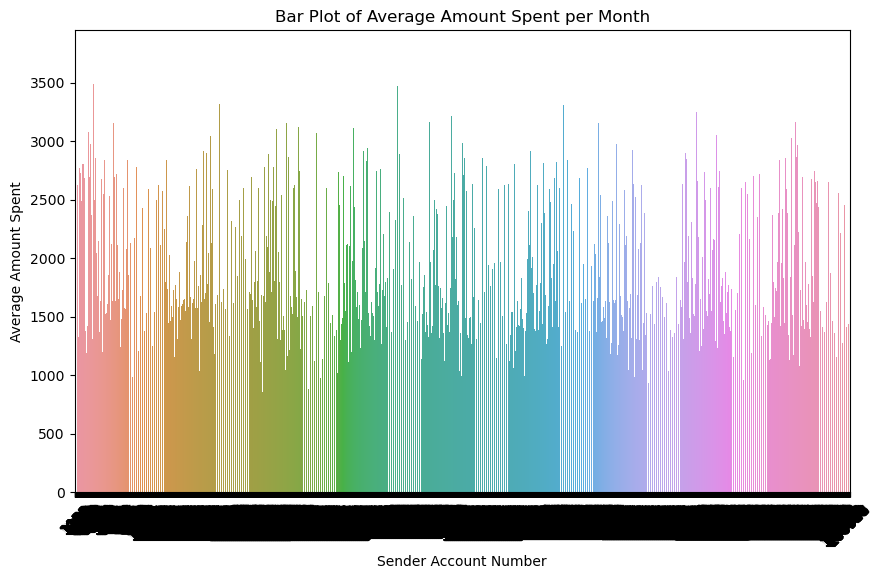

In [33]:
average_monthly_spending = filtered_df.groupby('Sender_Account_Num')['Amount'].mean().reset_index()

# Plot a bar plot of the average amount spent per month
plt.figure(figsize=(10, 6))
sns.barplot(x='Sender_Account_Num', y='Amount', data=average_monthly_spending, ci=None)
plt.title('Bar Plot of Average Amount Spent per Month')
plt.xlabel('Sender Account Number')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=45)
plt.show()

In [34]:
unique_senders = set(data['Sender_Account_Num'])
unique_receivers = set(data['Receiver_Account_Num'])

common_account_numbers = unique_senders.intersection(unique_receivers)

num_common_account_numbers = len(common_account_numbers)

print("Number of sender account numbers also present as receiver account numbers:", num_common_account_numbers)

Number of sender account numbers also present as receiver account numbers: 8127


In [35]:
inflow_account = data[[ 'Transaction_date', 'Receiver_Account_Num','Amount']]
inflow_account = inflow_account[inflow_account['Receiver_Account_Num'] != 0]

inflow_business = data[[ 'Transaction_date', 'Receiver_Name','Amount']]
inflow_business = inflow_business.dropna(subset=['Receiver_Name'])

outflow = data[[ 'Transaction_date', 'Sender_Account_Num','Amount']]


In [36]:
inflow_account

,Transaction_date,Receiver_Account_Num,Amount
71429,2025-01-03,50340,9.0
71602,2025-01-03,55738,5.5
111961,2025-01-04,5403,6.0
111965,2025-01-04,5403,6.0
111969,2025-01-04,5403,6.0
...,...,...,...
10036488,2025-12-27,83562,4.5
10036490,2025-12-27,83562,4.5
10095881,2025-12-28,12542,6.5
10095885,2025-12-28,32221,6.0


In [37]:
amount_earned_per_day = inflow_account.groupby(['Receiver_Account_Num', 'Transaction_date'])['Amount'].sum()
print(amount_earned_per_day)

Receiver_Account_Num  Transaction_date
1000                  2025-01-04           18.0
                      2025-01-05            9.0
                      2025-01-07          668.0
                      2025-01-10            5.5
                      2025-01-11            9.0
                                          ...  
100988                2025-12-19           28.0
                      2025-12-21           12.0
                      2025-12-25            5.5
                      2025-12-27           18.0
                      2025-12-28           13.0
Name: Amount, Length: 1427996, dtype: float64


In [38]:
inflow_business

,Transaction_date,Receiver_Name,Amount
15187,2025-01-01,STREAMING_SERVICE,8.99
17002,2025-01-01,GOURMET_COFFEE_SHOP,2.40
17005,2025-01-01,GOURMET_COFFEE_SHOP,2.55
17014,2025-01-01,A_LOCAL_COFFEE_SHOP,2.20
17019,2025-01-01,LOCAL_PUB,13.06
...,...,...,...
10105014,2025-12-29,CAFE,3.00
10121703,2025-12-30,LUNCH_PLACE,4.50
10138279,2025-12-31,LUNCH_VAN,3.00
10138280,2025-12-31,A_CAFE,1.95


In [39]:
amount_earned_per_day_business = inflow_business.groupby(['Receiver_Name', 'Transaction_date'])['Amount'].sum()

In [40]:
outflow

,Transaction_date,Sender_Account_Num,Amount
15187,2025-01-01,1000,8.99
17002,2025-01-01,1000,2.40
17005,2025-01-01,1000,2.55
17014,2025-01-01,1000,2.20
17019,2025-01-01,1000,13.06
...,...,...,...
10105014,2025-12-29,100988,3.00
10121703,2025-12-30,100988,4.50
10138279,2025-12-31,100988,3.00
10138280,2025-12-31,100988,1.95


In [41]:
amount_spent_per_day_business = outflow.groupby(['Sender_Account_Num', 'Transaction_date'])['Amount'].sum()

In [42]:
# filtered_df = summed_df[(summed_df['Sender_Account_Num'] == '1000.0') & (summed_df['Transaction_date'] == '2025-01-05') & (summed_df['Receiver_Account_Num'] == '16354')]
# print(filtered_df)

#### Nulls

In [43]:
data.isnull().sum()

Sender_Account_Num                0
Amount                            0
Receiver                          0
Transaction_date                  0
Transaction_Date                  0
Day_of_Week                       0
Month                             0
Week_of_Month                     0
Sender_Account_Num_Length         0
Receiver_Account_Num              0
Receiver_Name                     0
Receiver_Account_Num_Length       0
is_duplicate                      0
Days_between_trans             8142
dtype: int64

#### Data Stats

In [44]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Sender_Account_Num,10148280.0,50805.021701,1000.0,25304.0,50781.0,75633.0,100988.0,28937.100678
Amount,10148280.0,18.393485,1.45,2.65,6.0,12.0,1995.0,86.123232
Transaction_date,10148280,2025-07-02 20:10:40.958269696,2025-01-01 00:00:00,2025-04-02 00:00:00,2025-07-03 00:00:00,2025-10-04 00:00:00,2025-12-31 00:00:00,NaN
Day_of_Week,10148280.0,3.728669,0.0,2.0,4.0,5.0,6.0,1.897975
Week_of_Month,10148280.0,2.818001,1.0,2.0,3.0,4.0,5.0,1.291484
Sender_Account_Num_Length,10148280.0,4.920373,4.0,5.0,5.0,5.0,6.0,0.309151
Receiver_Account_Num,10148280.0,12785.606255,0.0,0.0,0.0,0.0,100988.0,26433.992868
Receiver_Account_Num_Length,10148280.0,1.979424,1.0,1.0,1.0,1.0,6.0,1.705149
Days_between_trans,10140138.0,0.291935,0.0,0.0,0.0,1.0,11.0,0.539447


In [45]:
data['date_column'] = pd.to_datetime(data['Transaction_date'], format='%m/%d/%Y')

# Convert datetime to timestamp
data['timestamp'] = data['date_column'].astype(int) / 10**9  # Convert nanoseconds to seconds


In [46]:
time = data['timestamp'].unique()
print(sorted(time))

[1735689600.0, 1735776000.0, 1735862400.0, 1735948800.0, 1736035200.0, 1736121600.0, 1736208000.0, 1736294400.0, 1736380800.0, 1736467200.0, 1736553600.0, 1736640000.0, 1736726400.0, 1736812800.0, 1736899200.0, 1736985600.0, 1737072000.0, 1737158400.0, 1737244800.0, 1737331200.0, 1737417600.0, 1737504000.0, 1737590400.0, 1737676800.0, 1737763200.0, 1737849600.0, 1737936000.0, 1738022400.0, 1738108800.0, 1738195200.0, 1738281600.0, 1738368000.0, 1738454400.0, 1738540800.0, 1738627200.0, 1738713600.0, 1738800000.0, 1738886400.0, 1738972800.0, 1739059200.0, 1739145600.0, 1739232000.0, 1739318400.0, 1739404800.0, 1739491200.0, 1739577600.0, 1739664000.0, 1739750400.0, 1739836800.0, 1739923200.0, 1740009600.0, 1740096000.0, 1740182400.0, 1740268800.0, 1740355200.0, 1740441600.0, 1740528000.0, 1740614400.0, 1740700800.0, 1740787200.0, 1740873600.0, 1740960000.0, 1741046400.0, 1741132800.0, 1741219200.0, 1741305600.0, 1741392000.0, 1741478400.0, 1741564800.0, 1741651200.0, 1741737600.0, 17418

In [47]:
# Convert timestamp column to datetime
data['datetime'] = pd.to_datetime(data['timestamp'], unit='s')

# Extract hours, minutes, and seconds
data['hours'] = data['datetime'].dt.hour
data['minutes'] = data['datetime'].dt.minute
data['seconds'] = data['datetime'].dt.second

data

,Sender_Account_Num,Amount,Receiver,Transaction_date,Transaction_Date,Day_of_Week,Month,Week_of_Month,Sender_Account_Num_Length,Receiver_Account_Num,Receiver_Name,Receiver_Account_Num_Length,is_duplicate,Days_between_trans,date_column,timestamp,datetime,hours,minutes,seconds
15187,1000,8.99,STREAMING_SERVICE,2025-01-01,01/01/2025,2,January,1,4,0,STREAMING_SERVICE,1,False,NaN,2025-01-01,1.735690e+09,2025-01-01,0,0,0
17002,1000,2.40,GOURMET_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1,4,0,GOURMET_COFFEE_SHOP,1,False,0.0,2025-01-01,1.735690e+09,2025-01-01,0,0,0
17005,1000,2.55,GOURMET_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1,4,0,GOURMET_COFFEE_SHOP,1,False,0.0,2025-01-01,1.735690e+09,2025-01-01,0,0,0
17014,1000,2.20,A_LOCAL_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1,4,0,A_LOCAL_COFFEE_SHOP,1,False,0.0,2025-01-01,1.735690e+09,2025-01-01,0,0,0
17019,1000,13.06,LOCAL_PUB,2025-01-01,01/01/2025,2,January,1,4,0,LOCAL_PUB,1,False,0.0,2025-01-01,1.735690e+09,2025-01-01,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10105014,100988,3.00,CAFE,2025-12-29,12/29/2025,0,December,5,6,0,CAFE,1,False,0.0,2025-12-29,1.766966e+09,2025-12-29,0,0,0
10121703,100988,4.50,LUNCH_PLACE,2025-12-30,12/30/2025,1,December,5,6,0,LUNCH_PLACE,1,False,1.0,2025-12-30,1.767053e+09,2025-12-30,0,0,0
10138279,100988,3.00,LUNCH_VAN,2025-12-31,12/31/2025,2,December,5,6,0,LUNCH_VAN,1,False,1.0,2025-12-31,1.767139e+09,2025-12-31,0,0,0
10138280,100988,1.95,A_CAFE,2025-12-31,12/31/2025,2,December,5,6,0,A_CAFE,1,False,0.0,2025-12-31,1.767139e+09,2025-12-31,0,0,0


In [48]:
# data.describe(include='all').T

In [49]:
# a = data['Sender_Account_Num'].unique()
# print(sorted(a))

In [50]:
# b = data['Receiver_Account_Num'].unique()
# b

#### Extracting Receiver Account NAMES

In [51]:
receiver_names = data[data['Receiver'].str.isalpha()]['Receiver_Account_Num'].drop_duplicates()
# receiver_names = receiver_names[['Receiver_Account_Num']].drop_duplicates()

receiver_names

receiver_names.to_csv('result_check.csv', index=False)

In [52]:
# iltered_df = data[data['Receiver_Account_Num'].str.lower() == 'accessory_shop']
# iltered_df

In [53]:
receiver_nums = data[['Receiver_Account_Num']].drop_duplicates()

receiver_nums


,Receiver_Account_Num
15187,0
71429,50340
71602,55738
111961,5403
112622,82909
...,...
296183,79680
157442,46184
8546,75418
728142,69683


In [54]:
receiver_nums.to_csv('receiver_num.csv', index=False)

#### Calculate length of Account Numbers

In [55]:


# def calculate_length(value):
#     if value.isdigit():
#         return len(value)
#     else:
#         return 0

# # Create the 'length' column using the custom function
# data['Receiver_Account_Length'] = data['Receiver_Account_Num'].apply(calculate_length)
# data['Sender_Account_Num'] = data['Sender_Account_Num'].apply(calculate_length)

# data

In [56]:
data['Sender_Account_Length'] = len('Sender_Account_Num')
data

,Sender_Account_Num,Amount,Receiver,Transaction_date,Transaction_Date,Day_of_Week,Month,Week_of_Month,Sender_Account_Num_Length,Receiver_Account_Num,...,Receiver_Account_Num_Length,is_duplicate,Days_between_trans,date_column,timestamp,datetime,hours,minutes,seconds,Sender_Account_Length
15187,1000,8.99,STREAMING_SERVICE,2025-01-01,01/01/2025,2,January,1,4,0,...,1,False,NaN,2025-01-01,1.735690e+09,2025-01-01,0,0,0,18
17002,1000,2.40,GOURMET_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1,4,0,...,1,False,0.0,2025-01-01,1.735690e+09,2025-01-01,0,0,0,18
17005,1000,2.55,GOURMET_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1,4,0,...,1,False,0.0,2025-01-01,1.735690e+09,2025-01-01,0,0,0,18
17014,1000,2.20,A_LOCAL_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1,4,0,...,1,False,0.0,2025-01-01,1.735690e+09,2025-01-01,0,0,0,18
17019,1000,13.06,LOCAL_PUB,2025-01-01,01/01/2025,2,January,1,4,0,...,1,False,0.0,2025-01-01,1.735690e+09,2025-01-01,0,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10105014,100988,3.00,CAFE,2025-12-29,12/29/2025,0,December,5,6,0,...,1,False,0.0,2025-12-29,1.766966e+09,2025-12-29,0,0,0,18
10121703,100988,4.50,LUNCH_PLACE,2025-12-30,12/30/2025,1,December,5,6,0,...,1,False,1.0,2025-12-30,1.767053e+09,2025-12-30,0,0,0,18
10138279,100988,3.00,LUNCH_VAN,2025-12-31,12/31/2025,2,December,5,6,0,...,1,False,1.0,2025-12-31,1.767139e+09,2025-12-31,0,0,0,18
10138280,100988,1.95,A_CAFE,2025-12-31,12/31/2025,2,December,5,6,0,...,1,False,0.0,2025-12-31,1.767139e+09,2025-12-31,0,0,0,18


In [57]:
# grouped = data.groupby(['Sender_Account_Num', 'Receiver_Account_Num', 'Month']).sum().reset_index()

# max_amounts = grouped.loc[grouped.groupby(['Sender_Account_Num', 'Month'])['Amount'].idxmax()]

# print(max_amounts)

#### Unique Lengths of Account numbers

In [58]:
# Sender_Account_Length = data['Sender_Account_Length'].unique()
# print(sorted(Sender_Account_Length))

# Receiver_Account_Length = data['Receiver_Account_Length'].unique()
# print(sorted(Receiver_Account_Length))

#### Min date

In [59]:
min_date = data['Transaction_date'].min()
min_date

Timestamp('2025-01-01 00:00:00')

#### Max date

In [60]:
max_date = data['Transaction_date'].max()
max_date

Timestamp('2025-12-31 00:00:00')

#### Missing dates

In [61]:
date_range = pd.date_range(start=min_date, end=max_date)
missing_dates = date_range[~date_range.isin(data['Transaction_date'])]
missing_dates

DatetimeIndex(['2025-08-22'], dtype='datetime64[ns]', freq='D')

#### Extracting month and year

In [62]:
data['Transaction_Month'] = data['Transaction_date'].dt.month
data['Transaction_Year'] = data['Transaction_date'].dt.year
data

,Sender_Account_Num,Amount,Receiver,Transaction_date,Transaction_Date,Day_of_Week,Month,Week_of_Month,Sender_Account_Num_Length,Receiver_Account_Num,...,Days_between_trans,date_column,timestamp,datetime,hours,minutes,seconds,Sender_Account_Length,Transaction_Month,Transaction_Year
15187,1000,8.99,STREAMING_SERVICE,2025-01-01,01/01/2025,2,January,1,4,0,...,NaN,2025-01-01,1.735690e+09,2025-01-01,0,0,0,18,1,2025
17002,1000,2.40,GOURMET_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1,4,0,...,0.0,2025-01-01,1.735690e+09,2025-01-01,0,0,0,18,1,2025
17005,1000,2.55,GOURMET_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1,4,0,...,0.0,2025-01-01,1.735690e+09,2025-01-01,0,0,0,18,1,2025
17014,1000,2.20,A_LOCAL_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1,4,0,...,0.0,2025-01-01,1.735690e+09,2025-01-01,0,0,0,18,1,2025
17019,1000,13.06,LOCAL_PUB,2025-01-01,01/01/2025,2,January,1,4,0,...,0.0,2025-01-01,1.735690e+09,2025-01-01,0,0,0,18,1,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10105014,100988,3.00,CAFE,2025-12-29,12/29/2025,0,December,5,6,0,...,0.0,2025-12-29,1.766966e+09,2025-12-29,0,0,0,18,12,2025
10121703,100988,4.50,LUNCH_PLACE,2025-12-30,12/30/2025,1,December,5,6,0,...,1.0,2025-12-30,1.767053e+09,2025-12-30,0,0,0,18,12,2025
10138279,100988,3.00,LUNCH_VAN,2025-12-31,12/31/2025,2,December,5,6,0,...,1.0,2025-12-31,1.767139e+09,2025-12-31,0,0,0,18,12,2025
10138280,100988,1.95,A_CAFE,2025-12-31,12/31/2025,2,December,5,6,0,...,0.0,2025-12-31,1.767139e+09,2025-12-31,0,0,0,18,12,2025


#### Amount in negative

In [63]:
negative_amount_rows = data[data['Amount'] < 0]
negative_amount_rows

,Sender_Account_Num,Amount,Receiver,Transaction_date,Transaction_Date,Day_of_Week,Month,Week_of_Month,Sender_Account_Num_Length,Receiver_Account_Num,...,Days_between_trans,date_column,timestamp,datetime,hours,minutes,seconds,Sender_Account_Length,Transaction_Month,Transaction_Year


#### Number of transactions by month

<BarContainer object of 12 artists>

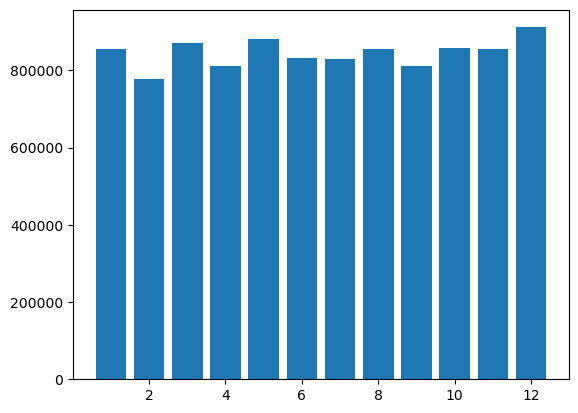

In [64]:
import matplotlib.pyplot as plt

transaction_counts_Date = data.groupby(['Transaction_Month']).size().reset_index(name='TransactionCount')
transaction_counts_Date.sort_values(by='TransactionCount', ascending=False)

plt.bar(transaction_counts_Date['Transaction_Month'], transaction_counts_Date['TransactionCount'])


#### Amount spent by month

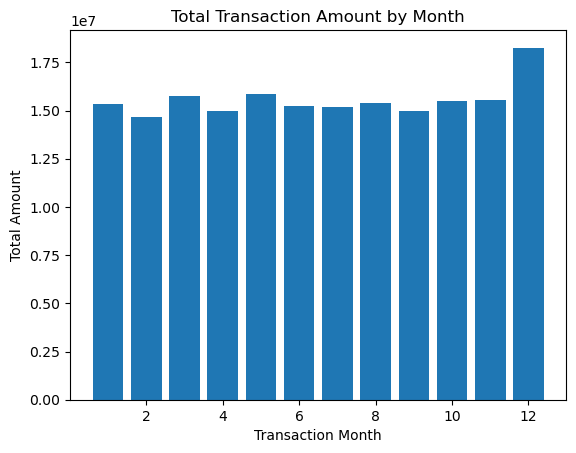

In [65]:
amount_sum_by_month = data.groupby(['Transaction_Month'])['Amount'].sum().reset_index(name='TotalAmount')
amount_sum_by_month = amount_sum_by_month.sort_values(by='TotalAmount', ascending=False)

plt.bar(amount_sum_by_month['Transaction_Month'], amount_sum_by_month['TotalAmount'])
plt.xlabel('Transaction Month')
plt.ylabel('Total Amount')
plt.title('Total Transaction Amount by Month')
plt.show()

In [66]:
sender_stats = data.groupby('Sender_Account_Num').agg(TransactionCount=('Sender_Account_Num', 'count'), TotalAmount=('Amount', 'sum')).reset_index()
sender_stats

,Sender_Account_Num,TransactionCount,TotalAmount
0,1000,1710,28698.51
1,1002,1043,15622.97
2,1006,1841,18778.19
3,1018,805,15612.21
4,1053,1319,19444.57
...,...,...,...
8137,100931,1664,22332.81
8138,100934,1111,18579.25
8139,100947,1586,20783.20
8140,100986,1034,15314.23


In [68]:
monthly_max_amounts = data.groupby(['Sender_Account_Num', 'Transaction_Month'])['Amount'].max().reset_index()
monthly_max_amounts


,Sender_Account_Num,Transaction_Month,Amount
0,1000,1,1670.0
1,1000,2,1740.0
2,1000,3,1125.0
3,1000,4,1000.0
4,1000,5,1115.0
...,...,...,...
97699,100988,8,287.0
97700,100988,9,287.0
97701,100988,10,287.0
97702,100988,11,287.0


In [69]:
result = pd.merge(data, monthly_max_amounts, how='left', on=['Sender_Account_Num', 'Transaction_Month', 'Amount'])

# Filter the result to keep only rows where the amount matches the maximum for each sender and month
#result_max_amounts = result[result['Amount_x'] == result['Amount_y']]

result

,Sender_Account_Num,Amount,Receiver,Transaction_date,Transaction_Date,Day_of_Week,Month,Week_of_Month,Sender_Account_Num_Length,Receiver_Account_Num,...,Days_between_trans,date_column,timestamp,datetime,hours,minutes,seconds,Sender_Account_Length,Transaction_Month,Transaction_Year
0,1000,8.99,STREAMING_SERVICE,2025-01-01,01/01/2025,2,January,1,4,0,...,NaN,2025-01-01,1.735690e+09,2025-01-01,0,0,0,18,1,2025
1,1000,2.40,GOURMET_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1,4,0,...,0.0,2025-01-01,1.735690e+09,2025-01-01,0,0,0,18,1,2025
2,1000,2.55,GOURMET_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1,4,0,...,0.0,2025-01-01,1.735690e+09,2025-01-01,0,0,0,18,1,2025
3,1000,2.20,A_LOCAL_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1,4,0,...,0.0,2025-01-01,1.735690e+09,2025-01-01,0,0,0,18,1,2025
4,1000,13.06,LOCAL_PUB,2025-01-01,01/01/2025,2,January,1,4,0,...,0.0,2025-01-01,1.735690e+09,2025-01-01,0,0,0,18,1,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10148275,100988,3.00,CAFE,2025-12-29,12/29/2025,0,December,5,6,0,...,0.0,2025-12-29,1.766966e+09,2025-12-29,0,0,0,18,12,2025
10148276,100988,4.50,LUNCH_PLACE,2025-12-30,12/30/2025,1,December,5,6,0,...,1.0,2025-12-30,1.767053e+09,2025-12-30,0,0,0,18,12,2025
10148277,100988,3.00,LUNCH_VAN,2025-12-31,12/31/2025,2,December,5,6,0,...,1.0,2025-12-31,1.767139e+09,2025-12-31,0,0,0,18,12,2025
10148278,100988,1.95,A_CAFE,2025-12-31,12/31/2025,2,December,5,6,0,...,0.0,2025-12-31,1.767139e+09,2025-12-31,0,0,0,18,12,2025


#### Number of transactions by each receiver / highest receiver

In [70]:
transaction_counts_Date = data.groupby(['Receiver_Account_Num']).size().reset_index(name='TransactionCount')
transaction_counts_Date.sort_values(by='TransactionCount', ascending=False)

,Receiver_Account_Num,TransactionCount
0,0,7615517
4556,33124,2598
8623,61751,663
9630,68605,623
1746,13309,594
...,...,...
10450,74519,2
6544,47342,2
13376,95337,2
3370,24699,2


In [71]:
transaction_counts_Date = data.groupby(['Sender_Account_Num','Receiver_Account_Num']).size().reset_index(name='TransactionCount')
transaction_counts_Date.sort_values(by='TransactionCount', ascending=False)

,Sender_Account_Num,Receiver_Account_Num,TransactionCount
121977,97033,0,2391
109308,87324,0,2348
117316,93372,0,2316
17440,14877,0,2255
93931,74448,0,2249
...,...,...,...
58505,46700,36283,1
19140,16187,33124,1
93959,74456,72750,1
78176,62083,33124,1


In [72]:
transaction_counts_Date = data.groupby(['Receiver_Account_Num'])['Amount'].sum().reset_index()
# transaction_counts_Date.sort_values(by='Amount', ascending=False)


# TRANSACTION PATTERN ANALYSIS

In [73]:
import pandas as pd
from datetime import datetime

# # Convert 'Day_of_Week' column to string for easier grouping
# data['Day_of_Week'] = data['Day_of_Week'].apply(lambda x: datetime.strftime(pd.to_datetime(str(x), format='%w'), '%A'))

day = data['Day_of_Week'].unique()
print(sorted(day))

[0, 1, 2, 3, 4, 5, 6]


In [74]:
# Transaction patterns by day of the week
day_of_week_patterns = data.groupby('Day_of_Week')['Amount'].agg(['count', 'sum', 'mean'])
print("Transaction patterns by day of the week:")
print(day_of_week_patterns)


Transaction patterns by day of the week:
               count          sum       mean
Day_of_Week                                 
0             895964  19916790.94  22.229454
1             895174  19979303.02  22.318905
2             912135  20103512.82  22.040063
3             888190  19843699.49  22.341728
4            2402198  35694018.95  14.858900
5            2080948  35571394.97  17.093841
6            2073671  35553515.30  17.145205


In [75]:
# Transaction patterns by month
month_patterns = data.groupby('Month')['Amount'].agg(['count', 'sum', 'mean'])
print("\nTransaction patterns by month:")
print(month_patterns)



Transaction patterns by month:
            count          sum       mean
Month                                    
April      812316  14981481.00  18.442922
August     856063  15391387.82  17.979270
December   911468  18256984.89  20.030308
February   776515  14645381.97  18.860398
January    854543  15356512.85  17.970439
July       828389  15181448.00  18.326472
June       832451  15252728.86  18.322675
March      871002  15746678.39  18.078809
May        881706  15835541.72  17.960116
November   854100  15538928.68  18.193336
October    858586  15514159.54  18.069430
September  811141  14961001.77  18.444391


In [76]:
# Transaction patterns by week of the month
week_of_month_patterns = data.groupby('Week_of_Month')['Amount'].agg(['count', 'sum', 'mean'])
print("\nTransaction patterns by week of the month:")
print(week_of_month_patterns)



Transaction patterns by week of the month:
                 count          sum       mean
Week_of_Month                                 
1              2020533  37957639.10  18.785954
2              2356529  44832046.14  19.024610
3              2357358  45114969.99  19.137937
4              2277104  43087690.60  18.922144
5              1136756  15669889.66  13.784743


In [77]:
# Transaction patterns by sender-receiver account pairs
account_pairs = data[['Sender_Account_Num', 'Receiver_Account_Num']].apply(tuple, axis=1)
account_pair_patterns = data.groupby(account_pairs)['Amount'].agg(['count', 'sum', 'mean'])
print("\nTransaction patterns by sender-receiver account pairs:")
print(account_pair_patterns.head())



Transaction patterns by sender-receiver account pairs:
               count       sum      mean
(1000, 0)       1335  10485.46  7.854277
(1000, 5403)      27    164.00  6.074074
(1000, 16354)     55    315.40  5.734545
(1000, 18013)     14     86.50  6.178571
(1000, 30208)      6     35.00  5.833333


In [78]:
# Transaction amount distribution
print("\nTransaction amount distribution:")
print(data['Amount'].describe())


Transaction amount distribution:
count    1.014828e+07
mean     1.839348e+01
std      8.612323e+01
min      1.450000e+00
25%      2.650000e+00
50%      6.000000e+00
75%      1.200000e+01
max      1.995000e+03
Name: Amount, dtype: float64
